<a href="https://colab.research.google.com/github/manelacavalcant/calculo-numerico/blob/main/EP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# exercício 1)

d = np.float32
def Simpson(f, a, b, n, dtype=d):  # a e b: limites superior e inferior da integral

  a, b = dtype(a), dtype(b)
  h = (a - b) / dtype(n)  # distância entre os pontos
  integral = dtype(f(a) + f(b))  # nos limites

  for i in range(1,n,2):  # índices 'pares'
    integral += dtype(4*f(b+(i*h)))

  for i in range(2,n-1,2):  # índices 'ímpares'
    integral += dtype(2*f(b+(i*h)))

  return (h/3)*integral

def f(x):
  return (6 - 6*(x**5))


a,b = 1,0
p = 0
I_anal = 5
E1,E2,P = [],[],[]

for i in range(1,26):
  p = i
  n = 2**p
  d = np.float32
  r1 = Simpson(f,a,b,n,dtype=d)
  e1 = abs(r1 - I_anal)
  d = np.float64
  r2 = Simpson(f,a,b,n,dtype=d)
  e2 = abs(r2 - I_anal)
  print(f'simples: p = {p}  N = {n}  I_num = {r1}  erro = {e1}')
  print(f'dupla: p = {p}  N = {n}  I_num = {r2}  erro = {e2}')
  E1,E2 = np.append(E1,e1),np.append(E2,e2)
  P = np.append(P,p)

simples: p = 1  N = 2  I_num = 4.875  erro = 0.125
dupla: p = 1  N = 2  I_num = 4.875  erro = 0.125
simples: p = 2  N = 4  I_num = 4.9921875  erro = 0.0078125
dupla: p = 2  N = 4  I_num = 4.9921875  erro = 0.0078125
simples: p = 3  N = 8  I_num = 4.99951171875  erro = 0.00048828125
dupla: p = 3  N = 8  I_num = 4.99951171875  erro = 0.00048828125
simples: p = 4  N = 16  I_num = 4.999969482421875  erro = 3.0517578125e-05
dupla: p = 4  N = 16  I_num = 4.999969482421875  erro = 3.0517578125e-05
simples: p = 5  N = 32  I_num = 4.999998092651367  erro = 1.9073486328125e-06
dupla: p = 5  N = 32  I_num = 4.999998092651367  erro = 1.9073486328125e-06
simples: p = 6  N = 64  I_num = 5.0000003178914385  erro = 3.1789143850602386e-07
dupla: p = 6  N = 64  I_num = 4.9999998807907104  erro = 1.1920928955078125e-07
simples: p = 7  N = 128  I_num = 4.999999682108561  erro = 3.178914393942023e-07
dupla: p = 7  N = 128  I_num = 4.999999992549419  erro = 7.450580596923828e-09
simples: p = 8  N = 256  I_n

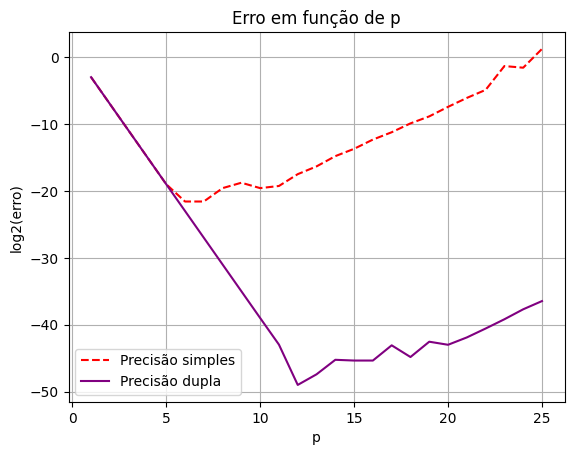

In [ ]:
plt.plot(P,np.log2(E1),color='red',label='Precisão simples',ls='--')
plt.plot(P,np.log2(E2),color='purple',label='Precisão dupla',ls='-')
plt.title('Erro em função de p')
plt.ylabel('log2(erro)')
plt.xlabel('p')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# exercício 2)

import numpy as np
import matplotlib.pyplot as plt

T_g = np.pi  # período de galileu para ângulos pequenos já considerando T/T_g


def Trapezio(f, a, b, n, k2):

  h = (b - a)/n
  integral = f(a,k2) + f(b,k2)

  for i in np.arange(1,n):
    integral += 2*f(a+i*h,k2)

  return (h/2)*integral


def f_(phi,k2):
  return 2*(1/(np.sqrt(1-(k2*(np.sin(phi)**2)))))

b = np.pi/2
a = 0

def valores(k,p):
  R,T = [],[]
  for i in np.arange(0,np.pi+k,k):
    theta = i
    k2 = (1-np.cos(theta))/2
    r = Trapezio(f_,a,b,1000,k2)/T_g
    if p:
      print(f'theta = {theta}  T/T_g = {r}')
    R,T = np.append(R,r),np.append(T,theta)
  return R,T

valores(np.pi/10,p=True)

theta = 0.0  T/T_g = 1.0
theta = 0.3141592653589793  T/T_g = 1.006203609554338
theta = 0.6283185307179586  T/T_g = 1.0252469567940001
theta = 0.9424777960769379  T/T_g = 1.05851785500672
theta = 1.2566370614359172  T/T_g = 1.1086728461990905
theta = 1.5707963267948966  T/T_g = 1.1803405990160982
theta = 1.8849555921538759  T/T_g = 1.281685302456369
theta = 2.199114857512855  T/T_g = 1.428287871207617
theta = 2.5132741228718345  T/T_g = 1.6550966447482427
theta = 2.827433388230814  T/T_g = 2.072390218014947
theta = 3.141592653589793  T/T_g = inf


<ipython-input-78-5a4a67f67877>:21: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*(1/(np.sqrt(1-(k2*(np.sin(phi)**2)))))


(array([1.        , 1.00620361, 1.02524696, 1.05851786, 1.10867285,
        1.1803406 , 1.2816853 , 1.42828787, 1.65509664, 2.07239022,
               inf]),
 array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
        1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
        3.14159265]))

<ipython-input-76-5e21b480c46a>:21: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*(1/(np.sqrt(1-(k2*(np.sin(phi)**2)))))


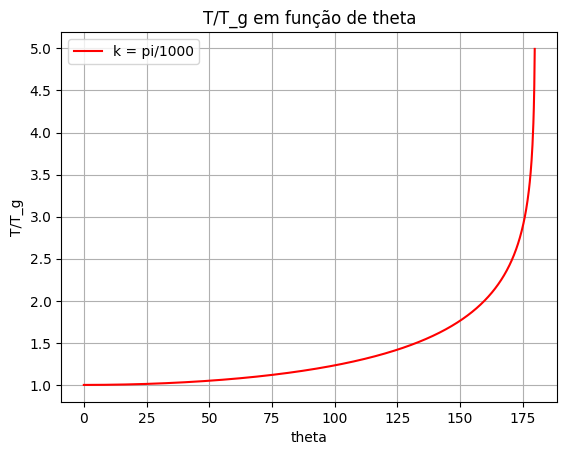

In [ ]:
R,T = valores(np.pi/1000,p=False)
plt.plot(np.degrees(T),R,color='r',label='k = pi/1000')
plt.title('T/T_g em função de theta')
plt.ylabel('T/T_g')
plt.xlabel('theta')
plt.grid(True)
plt.legend()
plt.show()

In [100]:
# exercício 3)

def F(x):
  return (1 - x**2)

def lcg(Z0, n):  # gerando o dobro de pontos para dividir entre x e y
    x = Z0  #  semente inicial
    a = 1103515245
    c = 12345
    m = 2147483647
    random = []

    for i in range(n):
        x = (a * x + c) % m
        U = x/m  # normaliza
        random.append(U)

    return random

n = 100
s = 12652466  # meu número USP

def I(n,s):
  random = lcg(s,n*2)
  x,y = random[:n],random[n:]  # dividindo os aleatórios entre x e y
  dentro = 0
  for i in range(n):
    if y[i] < F(x[i]):
      dentro += 1
  return dentro/n


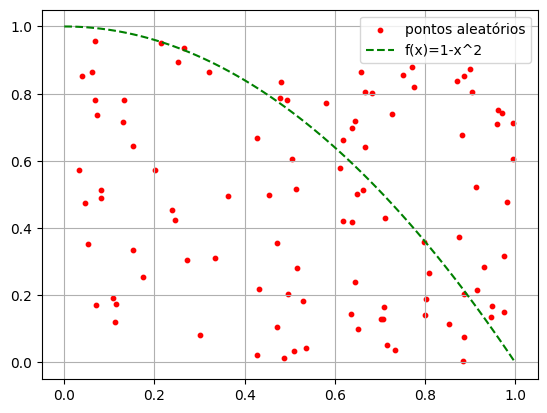

In [93]:
X = np.linspace(0,1,100)
Y = F(X)
plt.scatter(x,y,color='r',s=10,label='pontos aleatórios')
plt.plot(X,Y,color='g',ls='--',label='f(x)=1-x^2')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
A = []
for i in range(1,18):
  t = 2**i
  for Nt in range(t):
    A = np.append(A,I(n,s+Nt))  # modificando a semente para obter mais aleatórios
  print(f'Nt = {t}  I_m = {np.mean(A)}  sigma = {np.std(A)}  sig_m = {np.std(A)/np.sqrt(t)}')

Nt = 2  I_m = 0.6950000000000001  sigma = 0.04499999999999999  sig_m = 0.03181980515339463
Nt = 4  I_m = 0.7050000000000001  sigma = 0.04425306015783917  sig_m = 0.022126530078919585
Nt = 8  I_m = 0.7071428571428573  sigma = 0.043165556942108926  sig_m = 0.015261329013729636
Nt = 16  I_m = 0.6950000000000001  sigma = 0.05445181356024792  sig_m = 0.01361295339006198
Nt = 32  I_m = 0.6874193548387098  sigma = 0.05468193910332638  sig_m = 0.00966649248709798
Nt = 64  I_m = 0.678015873015873  sigma = 0.05461292133386379  sig_m = 0.006826615166732974
Nt = 128  I_m = 0.6711417322834645  sigma = 0.05259295848341832  sig_m = 0.004648604698285957
Nt = 256  I_m = 0.6691764705882353  sigma = 0.050729078903196945  sig_m = 0.003170567431449809
Nt = 512  I_m = 0.6680626223091977  sigma = 0.04874314636124697  sig_m = 0.0021541630830253823
Nt = 1024  I_m = 0.667663734115347  sigma = 0.047673296825792896  sig_m = 0.001489790525806028
Nt = 2048  I_m = 0.667266731802638  sigma = 0.04759818671772813  sig_